<a href="https://colab.research.google.com/github/morekajal/Tasks/blob/main/trial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# prompt: change working directory

import os

# Get the current working directory
cwd = os.getcwd()

# Change directory to the desired location
# For example, to change to the root directory of your Google Drive
new_dir = "/content/drive/MyDrive/Assignments/Senior ML Engineer   Data Scientist - Tensoriot/"
os.chdir(new_dir)

# Print the new working directory
print(os.getcwd())


/content/drive/MyDrive/Assignments/Senior ML Engineer   Data Scientist - Tensoriot


In [3]:
# prompt: list folder contents

import os

# Get the list of files and directories in the current working directory
files_and_directories = os.listdir()

# Print the list of files and directories
for file_or_directory in files_and_directories:
  print(file_or_directory)


Untitled0.ipynb
takehome_users 2.csv
takehome_user_engagement 1.csv


Imports

In [4]:
import pandas as pd
import numpy as np

 Load the Data

In [5]:
# Load the CSV files into pandas dataframes
users_data = pd.read_csv('takehome_users 2.csv', encoding='latin-1')
engagement_data = pd.read_csv('takehome_user_engagement 1.csv')


In [6]:
users_data.sample(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
6886,6887,2013-03-16 07:30:54,Karlsen Martin,MartinTKarlsen@jourrapide.com,ORG_INVITE,NaN,0,0,74,7716.0
2062,2063,2014-04-13 13:57:49,Gregersen Ella,EllaMGregersen@hotmail.com,ORG_INVITE,1.399644e+09,0,0,60,2354.0
2907,2908,2012-11-15 14:03:31,Poe Marvin,MarvinMPoe@gustr.com,PERSONAL_PROJECTS,1.352988e+09,1,0,0,NaN
5202,5203,2014-04-09 03:19:41,Kohler Karin,KarinKohler@hotmail.com,PERSONAL_PROJECTS,1.397014e+09,0,0,149,NaN
11802,11803,2013-01-31 00:20:33,Washer Vincent,VincentJWasher@gmail.com,SIGNUP,1.359592e+09,0,0,250,NaN


In [7]:
engagement_data.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
# # Unique values of each column
# unique_values = {column: users_data[column].unique() for column in users_data.columns}
# print("Unique Values:")
# for column, values in unique_values.items():
#     print(f"{column}: {values}")

In [10]:
users_data.shape

(12000, 10)

In [11]:
# Handling Missing Values
users_data['last_session_creation_time'].fillna(0, inplace=True)  # Assuming 0 represents missing values


In [12]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [13]:
# Drop the 'invited_by_user_id',  and 'name' column
users_data.drop(['invited_by_user_id','name'], axis=1, inplace=True)


In [14]:
users_data.shape

(12000, 8)

In [15]:
# Check for duplicate rows
duplicate_rows = users_data[users_data.duplicated()]

# Display duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [object_id, creation_time, email, creation_source, last_session_creation_time, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id]
Index: []


In [16]:
# Correcting Data Types
users_data['creation_time'] = pd.to_datetime(users_data['creation_time'])
users_data['last_session_creation_time'] = pd.to_datetime(users_data['last_session_creation_time'], unit='s')

In [17]:
users_data.head()

,object_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
0,1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11
1,2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1
2,3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94
3,4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1
4,5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193


In [18]:
users_data.shape

(12000, 8)

In [19]:
# Standardizing Data
users_data['email'] = users_data['email'].str.lower()

In [20]:
# Handling Categorical Data
users_data = pd.get_dummies(users_data, columns=['creation_source'], drop_first=True)

In [21]:
users_data.head()

,object_id,creation_time,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,augustcclausen@yahoo.com,2014-04-22 03:53:30,1,0,11,0,0,0,0
1,2,2013-11-15 03:45:04,matthewpoole@gustr.com,2014-03-31 03:45:04,0,0,1,1,0,0,0
2,3,2013-03-19 23:14:52,mitchellbottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1,0,0,0
3,4,2013-05-21 08:09:28,nicklassclausen@yahoo.com,2013-05-22 08:09:28,0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,graceraw@yahoo.com,2013-01-22 10:14:20,0,0,193,0,0,0,0


In [22]:
users_data.shape

(12000, 11)

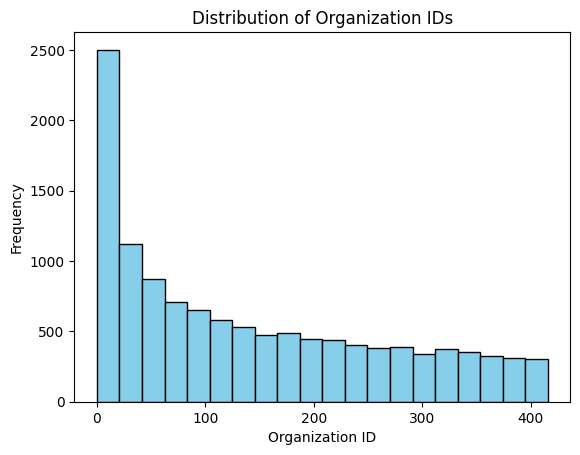

In [23]:
import matplotlib.pyplot as plt

plt.hist(users_data['org_id'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Organization ID')
plt.ylabel('Frequency')
plt.title('Distribution of Organization IDs')
plt.show()


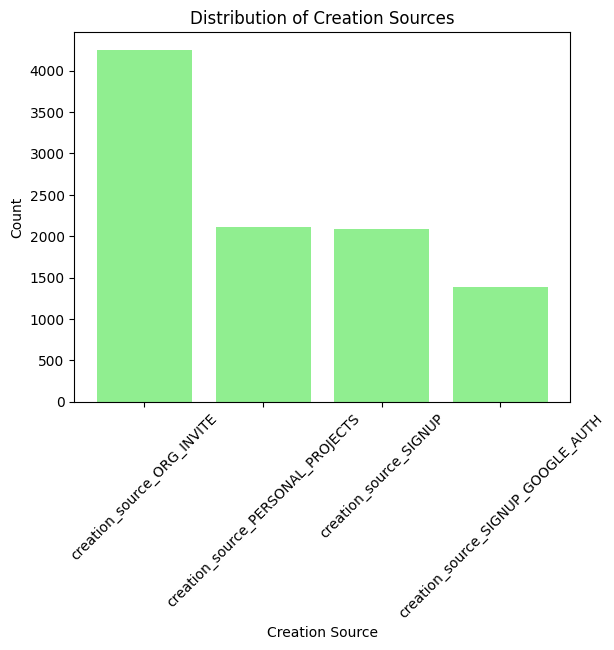

In [24]:
creation_source_counts = users_data[['creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']].sum()

plt.bar(creation_source_counts.index, creation_source_counts.values, color='lightgreen')
plt.xlabel('Creation Source')
plt.ylabel('Count')
plt.title('Distribution of Creation Sources')
plt.xticks(rotation=45)
plt.show()


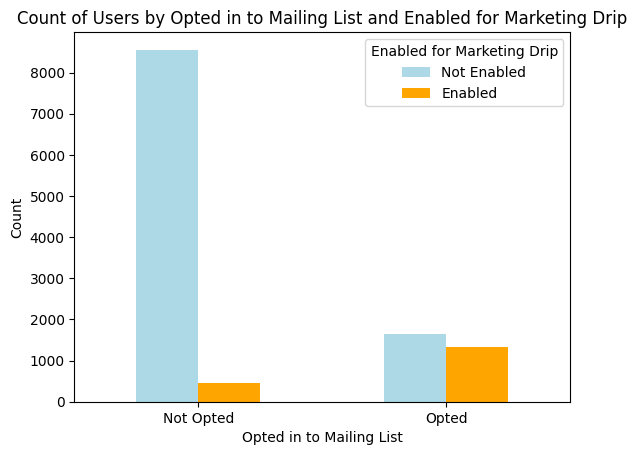

In [26]:
import matplotlib.pyplot as plt

# Group the data by 'opted_in_to_mailing_list' and 'enabled_for_marketing_drip' and count the occurrences
grouped_counts = users_data.groupby(['opted_in_to_mailing_list', 'enabled_for_marketing_drip']).size().unstack()

# Plot the grouped bar plot
grouped_counts.plot(kind='bar', color=['lightblue', 'orange'])
plt.xlabel('Opted in to Mailing List')
plt.ylabel('Count')
plt.title('Count of Users by Opted in to Mailing List and Enabled for Marketing Drip')
plt.xticks([0, 1], ['Not Opted', 'Opted'], rotation=0)
plt.legend(title='Enabled for Marketing Drip', labels=['Not Enabled', 'Enabled'])
plt.show()


Feature Engineering

In [ ]:
# Define a function to identify adopted users
def is_adopted_user(group):
    group['date'] = pd.to_datetime(group['time_stamp'])
    group = group.set_index('date')
    return group.resample('1D').count().rolling(window=7, min_periods=1)['user_id'].max().ge(3).any()


In [ ]:
# Apply the function to the engagement dataframe and get adopted users
adopted_users = engagement_data.groupby('user_id').apply(is_adopted_user)
adopted_users = adopted_users[adopted_users == True].index


In [ ]:
# Create a new column in users dataframe to indicate adopted users
users_data['adopted_user'] = users_data['object_id'].isin(adopted_users).astype(int)

In [ ]:
users_data.shape

(12000, 12)

In [ ]:
users_data.head()

,object_id,creation_time,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted_user
0,1,2014-04-22 03:53:30,augustcclausen@yahoo.com,2014-04-22 03:53:30,1,0,11,0,0,0,0,0
1,2,2013-11-15 03:45:04,matthewpoole@gustr.com,2014-03-31 03:45:04,0,0,1,1,0,0,0,0
2,3,2013-03-19 23:14:52,mitchellbottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1,0,0,0,0
3,4,2013-05-21 08:09:28,nicklassclausen@yahoo.com,2013-05-22 08:09:28,0,0,1,0,0,0,0,0
4,5,2013-01-17 10:14:20,graceraw@yahoo.com,2013-01-22 10:14:20,0,0,193,0,0,0,0,0


In [36]:
users_data.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted_user
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0
mean,6000.50000,0.249500,0.149333,141.884583,0.354500,0.175917,0.173917,0.115417,0.0
std,3464.24595,0.432742,0.356432,124.056723,0.478381,0.380765,0.379054,0.319537,0.0
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3000.75000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,6000.50000,0.000000,0.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9000.25000,0.000000,0.000000,238.250000,1.000000,0.000000,0.000000,0.000000,0.0
max,12000.00000,1.000000,1.000000,416.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [34]:
# Check for outliers in numerical columns
outliers = users_data.select_dtypes(include=['int64', 'float64']).apply(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
print("Outliers:")
print(outliers)


Outliers:
object_id                     17999.500
opted_in_to_mailing_list          0.000
enabled_for_marketing_drip        0.000
org_id                          552.125
adopted_user                      0.000
dtype: float64
